In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Segmentation data
pupil_xyr = [196.26, 139.09,  42.00]
iris_xyr  = [191.54, 142.90, 118.30]

# Output dilation
dil = 0.55

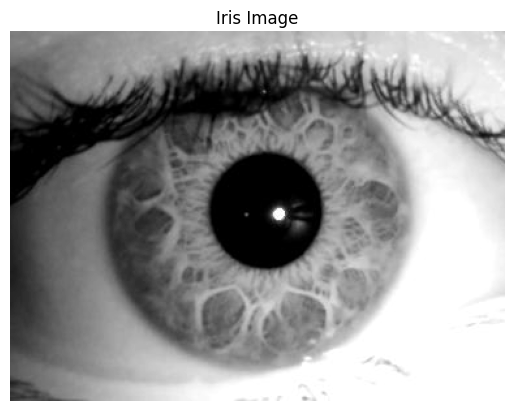

In [3]:
# Open input image
im1 = Image.open('../samples/NIR_1.png')

plt.imshow(im1, cmap='gray')
plt.title('Iris Image')
plt.axis('off')
plt.show()

In [4]:
# Get input shape
im1 = np.array(im1)
shape = im1.shape
if len(shape) == 2:
    im1 = np.expand_dims(im1, 2)
N, M, chanels = im1.shape

im1.shape

(284, 380, 1)

In [5]:
# Get color of central pixel
if chanels == 3:
    Rpup = im1[int(pupil_xyr[0]), int(pupil_xyr[1]) ,0]
    Gpup = im1[int(pupil_xyr[0]), int(pupil_xyr[1]) ,1]
    Bpup = im1[int(pupil_xyr[0]), int(pupil_xyr[1]) ,2]
    col = np.array([Rpup, Gpup, Bpup])
else:
    col = im1[int(pupil_xyr[0]), int(pupil_xyr[1])]
    
col

array([124], dtype=uint8)

In [6]:
# Get original pupuil and iris radii:
rp1 = pupil_xyr[2]
ri = iris_xyr[2]

print('Iris radius: {}'.format(ri))

Iris radius: 118.3


In [7]:
# Compute output pupil radius:
rp2 = dil*ri

print('Pupil radius: {} --> {}'.format(rp1,rp2))

Pupil radius: 42.0 --> 65.065


In [8]:
# Slope for lineal transformation:
m = (ri-rp1)/(ri-rp2)

In [9]:
# Create putput image:
im2 = np.zeros((N, M, chanels), dtype=np.uint8)

im2.shape

(284, 380, 1)

In [10]:
# Change dlation level
for u in range(M):
    for v in range(N):
        xp = u - pupil_xyr[0]
        yp = v - pupil_xyr[1]
        r_aux = xp**2 + yp**2;
        if r_aux <= ri**2 and r_aux >= rp2**2:
            rp = np.sqrt(r_aux)
            th = np.arctan2(yp,xp)
            r = m*(rp-rp2) + rp1
            x = int(r*np.cos(th) + pupil_xyr[0])
            y = int(r*np.sin(th) + pupil_xyr[1])
        elif r_aux < rp2**2:
            rp = np.sqrt(r_aux)
            th = np.arctan2(yp,xp)
            r = rp1*rp/rp2
            x = int(r*np.cos(th)+pupil_xyr[0])
            y = int(r*np.sin(th)+pupil_xyr[1])
        else:
            x = u
            y = v
            r = 2
        if r>0:
            im2[v,u,:] = im1[y,x,:]
        else:
            im2[v,u,:] = col
            
if chanels == 1:
    im2 = np.squeeze(im2, axis=2)
im2 = Image.fromarray(im2)

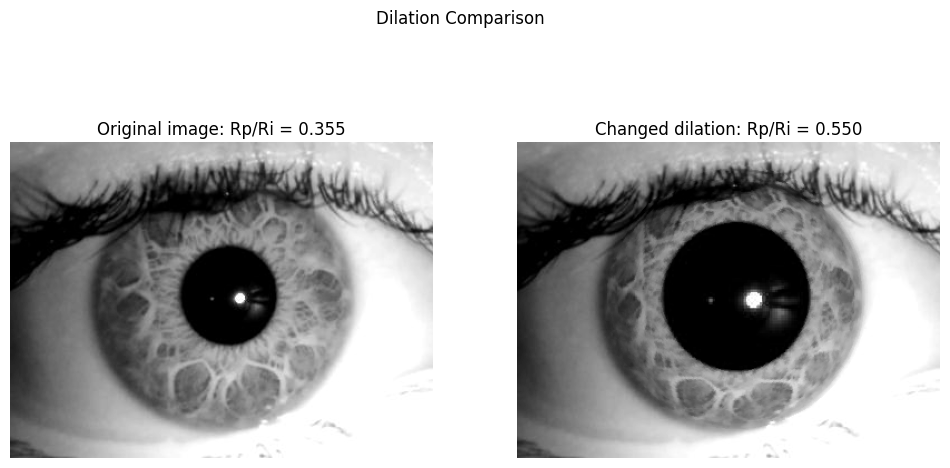

In [11]:
# Show results
fig, axs = plt.subplots(1,2, figsize=(12, 6))
fig.suptitle('Dilation Comparison')

axs[0].imshow(im1, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Original image: Rp/Ri = {:0.3f}'.format(rp1/ri))

axs[1].imshow(im2, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Changed dilation: Rp/Ri = {:0.3f}'.format(dil))

plt.show()